In [1]:
import os
import numpy as np
import cv2
#from keras.preprocessing import image
import keras.utils as image
from keras.applications.vgg16 import VGG16, preprocess_input
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Load pre-trained VGG-16 model
vgg_model = VGG16(weights='imagenet', include_top=False)

def extract_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = vgg_model.predict(x)
    return features.flatten()

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if os.path.isfile(img_path):
            img = cv2.imread(img_path)
            if img is not None:
                images.append(img_path)
    return images

def cluster_images(image_paths, num_clusters):
    features = []
    for img_path in image_paths:
        features.append(extract_features(img_path))
    features = np.array(features)

    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(features)
    cluster_labels = kmeans.fit_predict(features)

    silhouette_avg = silhouette_score(features, cluster_labels)

    return kmeans.labels_, kmeans.predict(features),silhouette_avg,features

# Path to the folder containing images
data_folder = r"images1/"

# Load images from folder
image_paths = load_images_from_folder(data_folder)

# Perform clustering
num_clusters = 3
cluster_labels,test_predictions,silhouette_avg,features = cluster_images(image_paths, num_clusters)

# Print cluster labels
predicted = []
for i, label in enumerate(cluster_labels):
    print(f"Image: {image_paths[i]}, Cluster: {label}")
    predicted.append(label)

2024-03-24 17:08:12.319746: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 0s 100ms/step


/Users/damlas/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/damlas/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Image: images1/2019_07_31_ci2c1.tif, Cluster: 1
Image: images1/2020_01_19_cs2b1.tif, Cluster: 1
Image: images1/2020_01_19_cd3a1.tif, Cluster: 1
Image: images1/2019_09_25_cd2b2.tif, Cluster: 2
Image: images1/2019_09_25_cs3a2.tif, Cluster: 2
Image: images1/2019_08_30_cs2l1.tif, Cluster: 0
Image: images1/2019_08_09_ws3a2.tif, Cluster: 2
Image: images1/07_31_ci1a1.tif, Cluster: 0
Image: images1/2019_08_09_wd2b2.tif, Cluster: 1
Image: images1/12_18_wd2a2.tif, Cluster: 1
Image: images1/2019_09_11_wd3b5.tif, Cluster: 1
Image: images1/2019_07_31_cd2g1.tif, Cluster: 2
Image: images1/2019_07_31_cs3d1.tif, Cluster: 1
Image: images1/2010_07_31_cs3b2.tif, Cluster: 2
Image: images1/2019_11_18_ci2b1.tif, Cluster: 2
Image: images1/09_11_wd2a3.tif, Cluster: 2
Image: images1/2019_07_31_cd2k2.tif, Cluster: 2
Image: images1/08_30_PRE_cd1a3.tif, Cluster: 0
Image: images1/2019_07_31_cs2b1.tif, Cluster: 2
Image: images1/01_18_cd2a1.tif, Cluster: 0
Image: images1/2019_08_09_wd1e4.tif, Cluster: 2
Image: images

In [2]:
print(silhouette_avg)

0.035842665


In [3]:
from sklearn.metrics import davies_bouldin_score
db_index = davies_bouldin_score(features,cluster_labels)
print(db_index)

4.13517583139076


/Users/damlas/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.04098287


/Users/damlas/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.03580695


/Users/damlas/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.030722473


/Users/damlas/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.0341999


/Users/damlas/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.02994642


/Users/damlas/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8 The average silhouette_score is : 0.034282297


/Users/damlas/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 10 The average silhouette_score is : 0.03205706


/Users/damlas/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 12 The average silhouette_score is : 0.026971946


/Users/damlas/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 20 The average silhouette_score is : 0.022973286


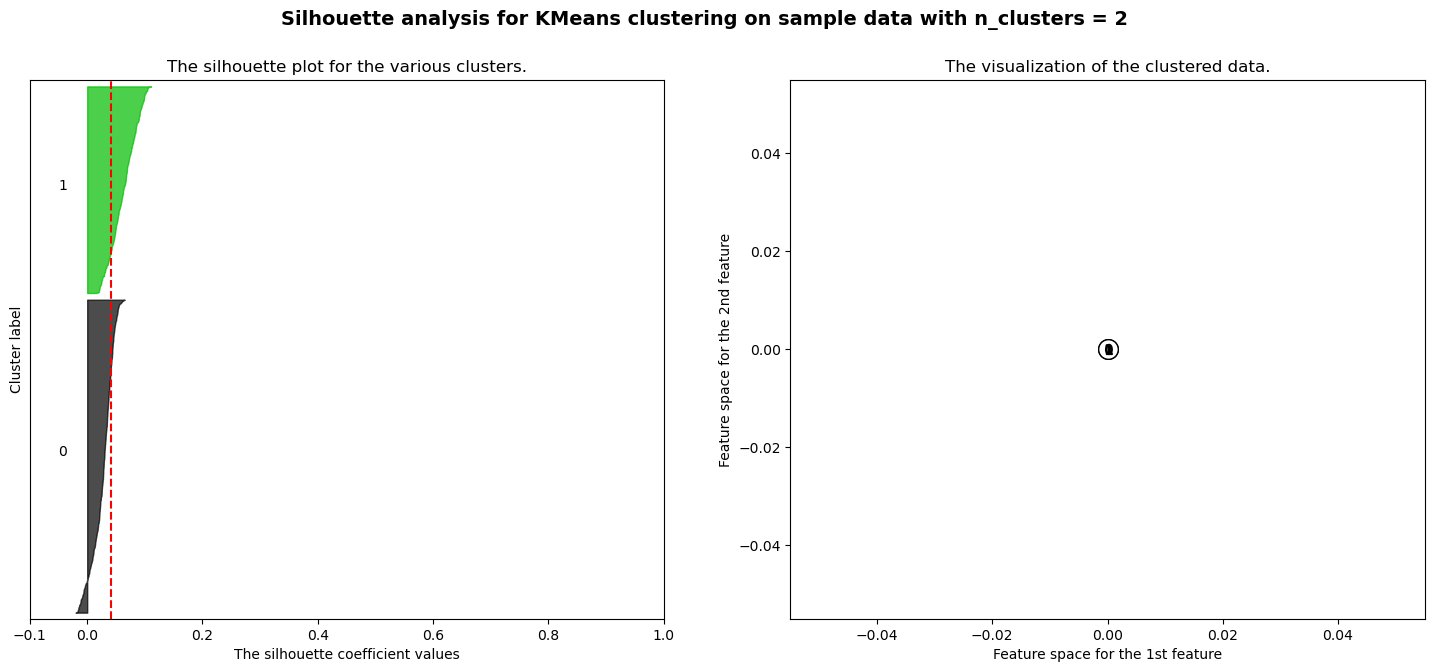

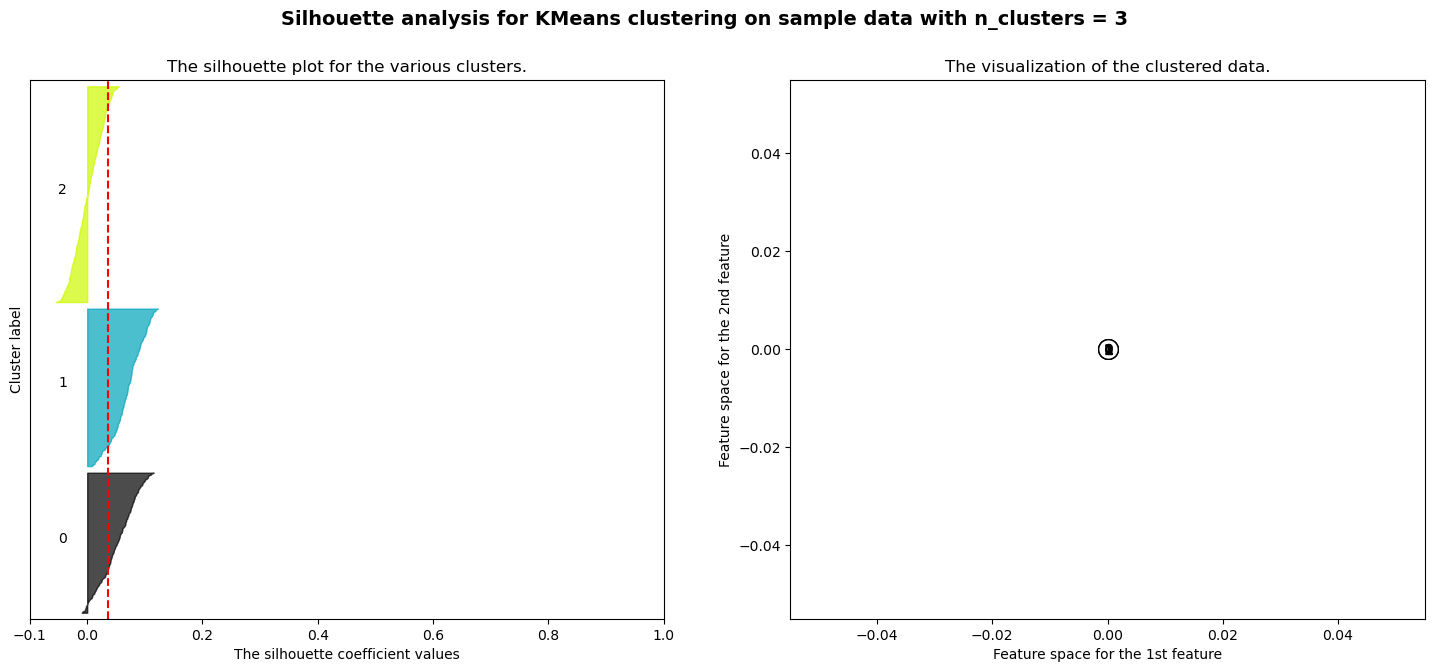

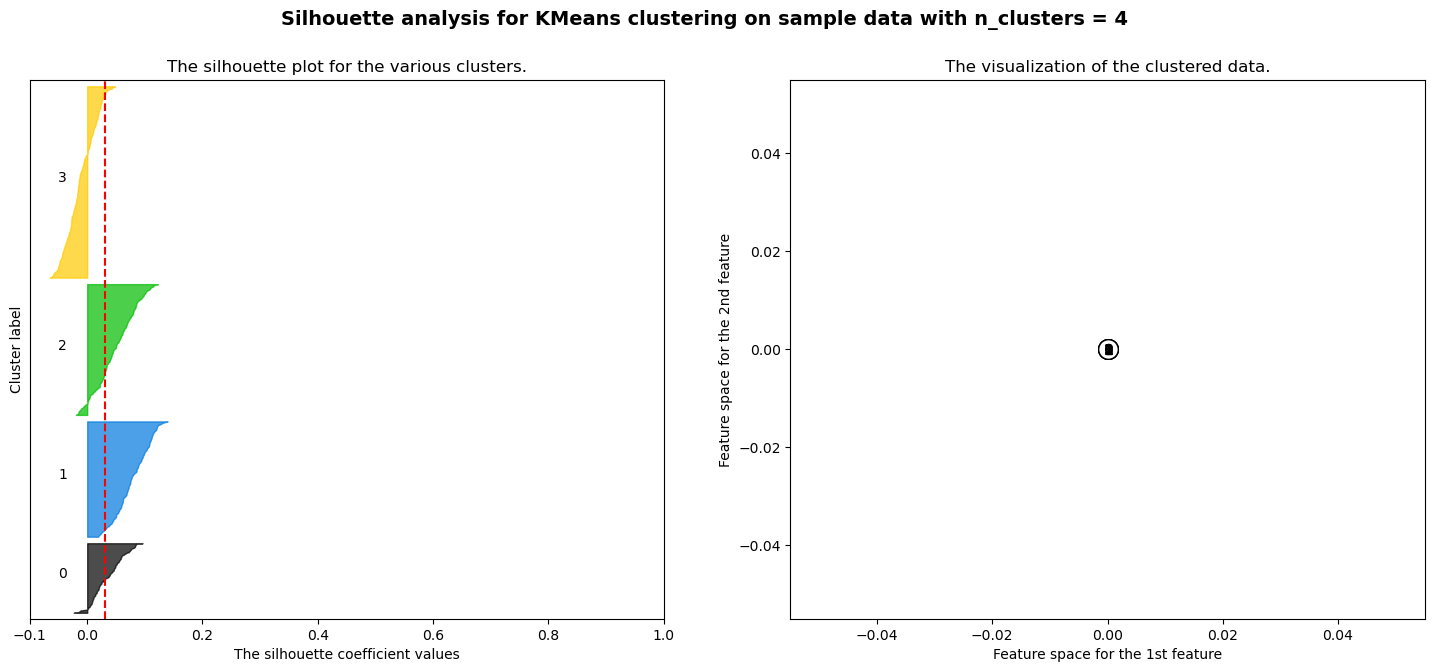

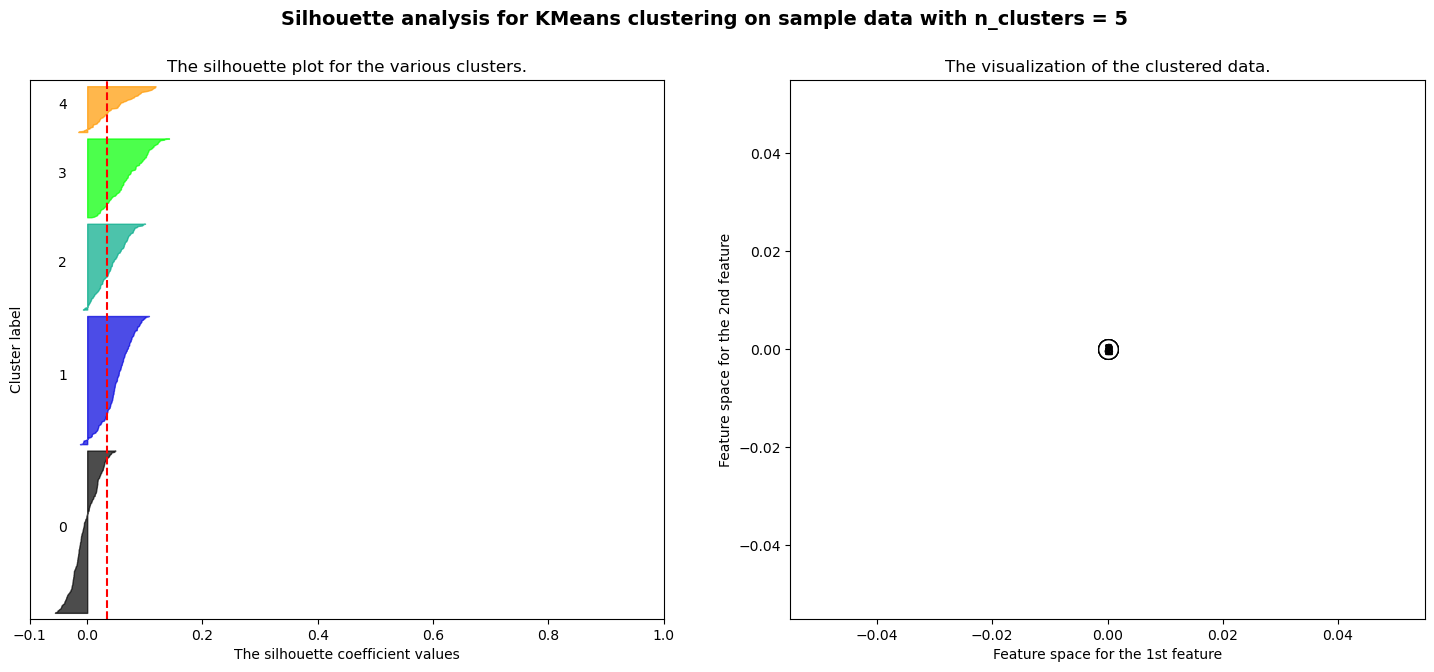

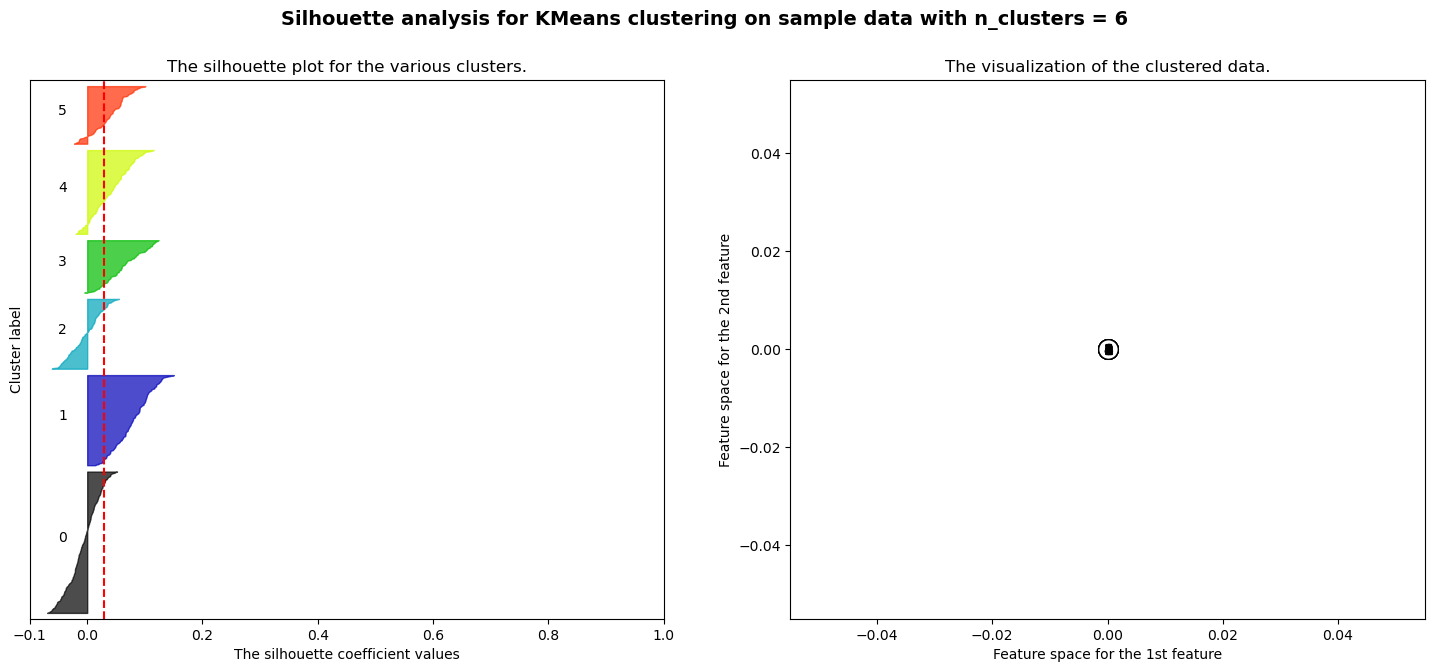

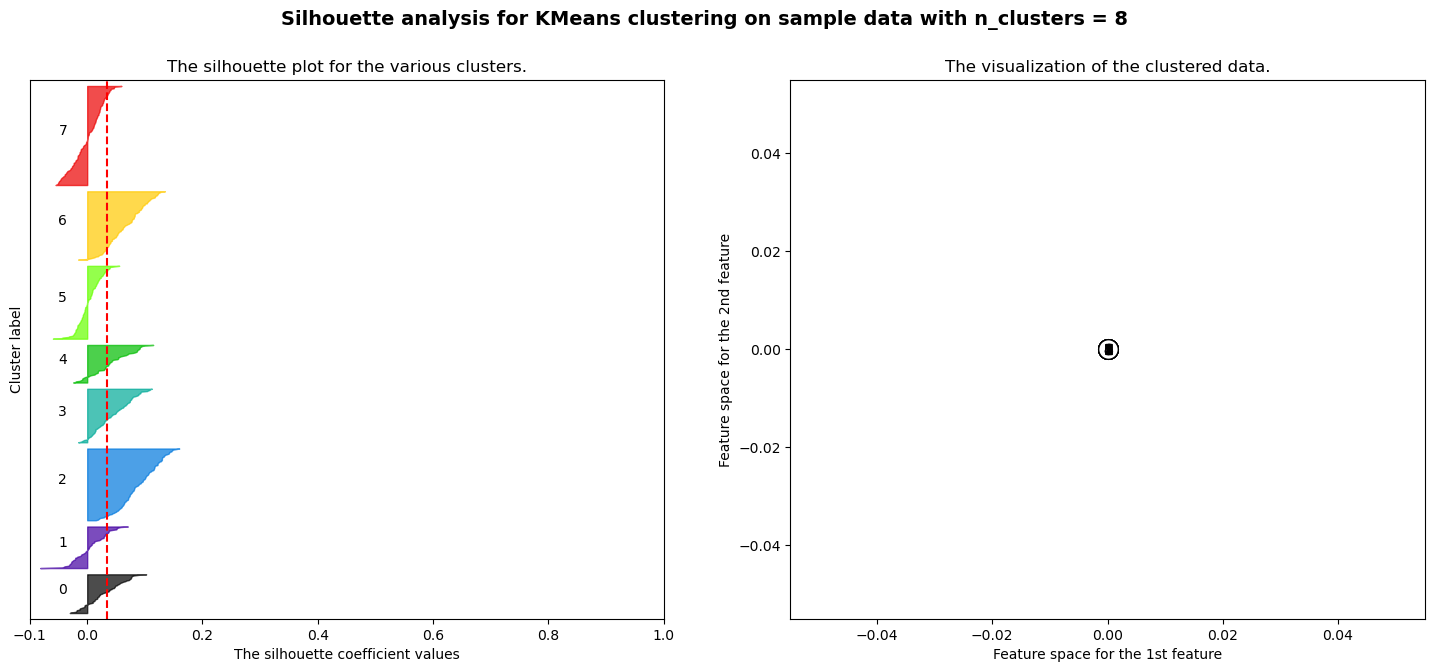

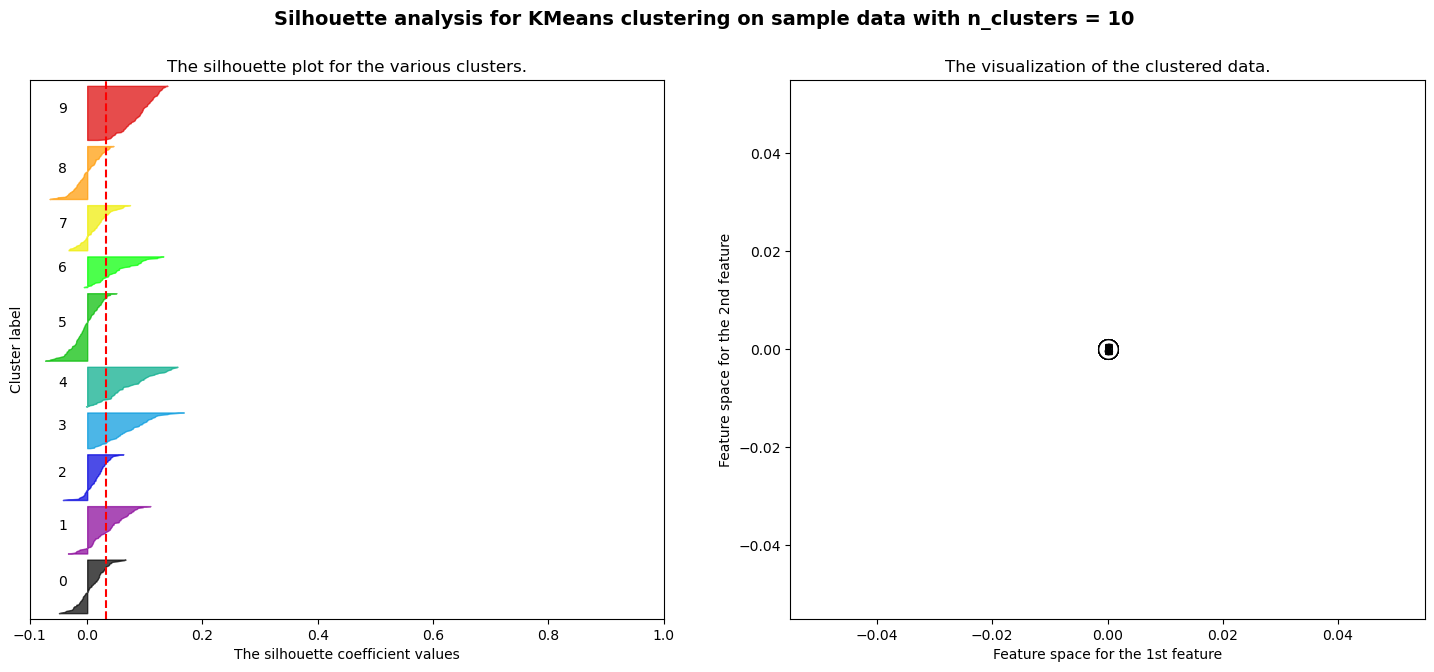

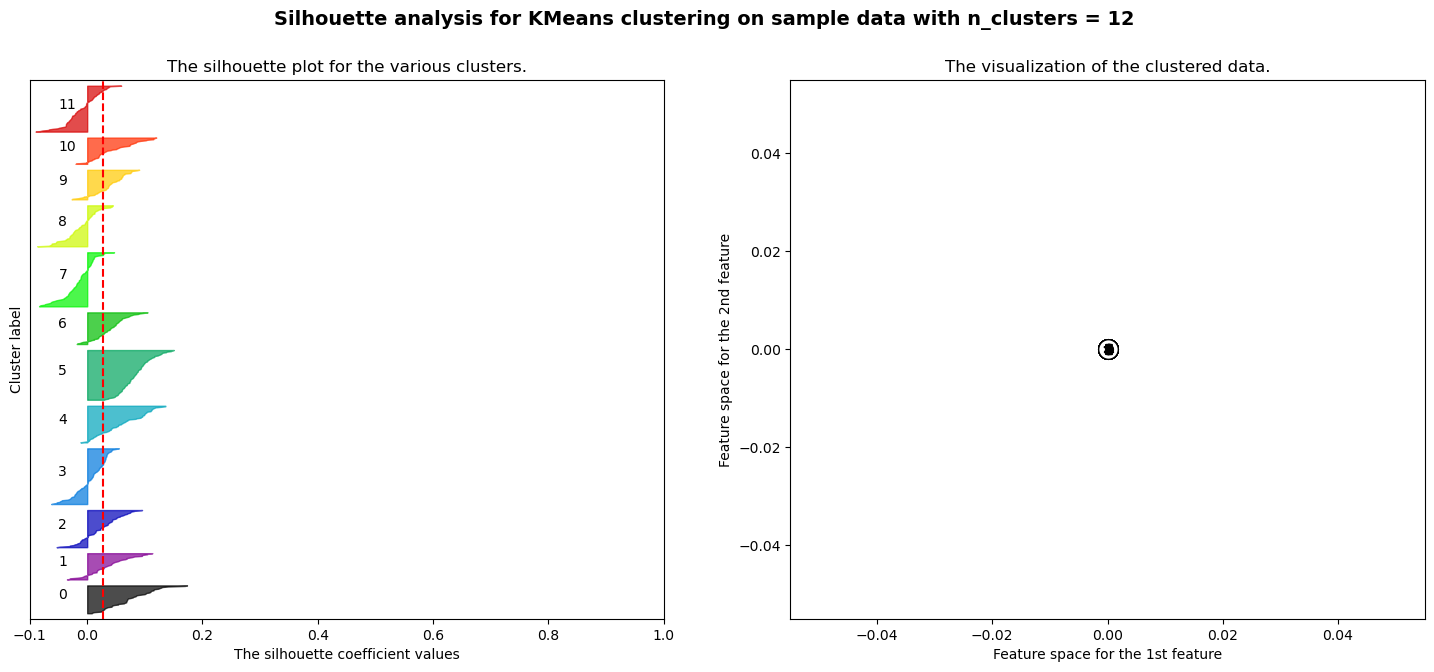

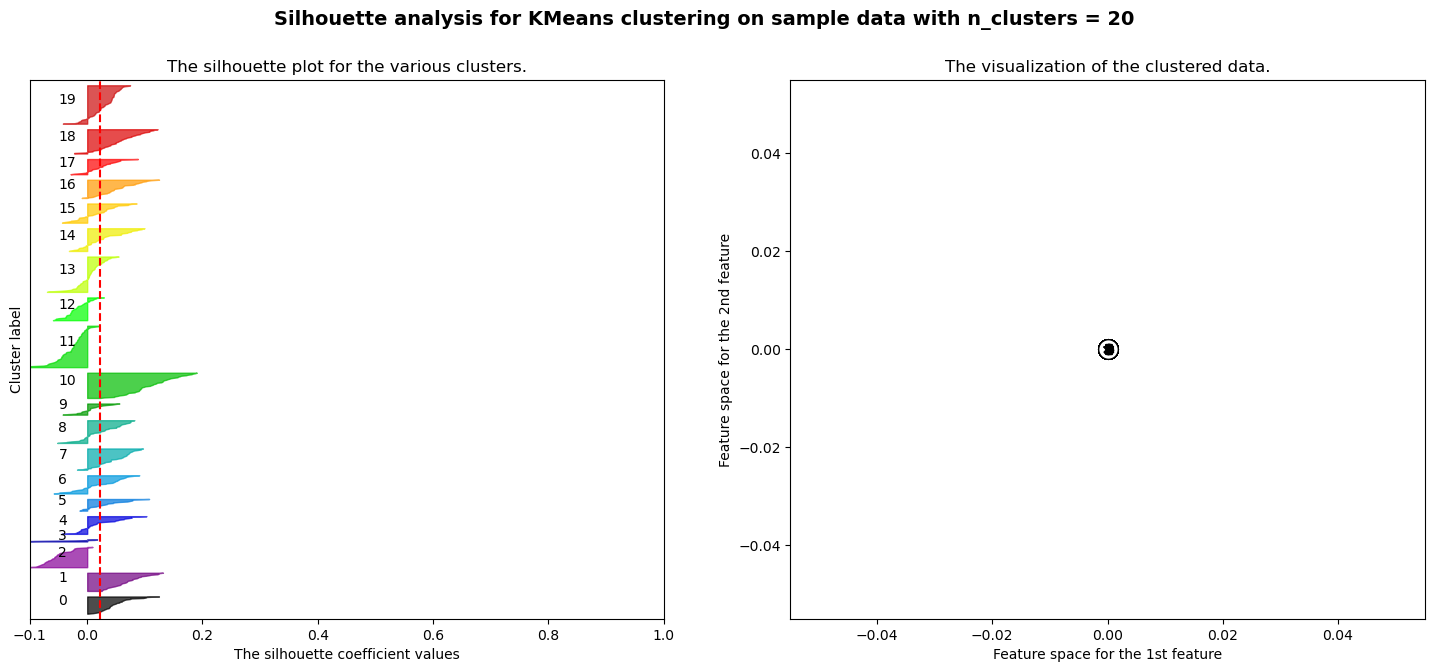

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6,8,10,12,20]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(features) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(features)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(features, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(features, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(features[:, 0], features[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [ ]:
predicted

In [ ]:
# this is just incase you want to see which value for k might be the best
sse = []
list_k = list(range(3, 15))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=22) #, n_jobs=-1)
    km.fit(features)

    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse)
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [ ]:
import re
actual = []
letter_list = []
for i in range(len(image_paths)):
  #print(image_paths[i])
  print(re.split('-',image_paths[i])[1])
  letter_list.append(re.split('-',image_paths[i])[1])


for l in letter_list:
  if 'O' == l:
    actual.append(1)
  elif 'M' == l:
    actual.append(0)
  elif 'Y' ==  l:
    actual.append(2)
  elif 'MO' == l:
    actual.append(1)
  elif 'MY' ==  l:
    actual.append(2)

In [ ]:
len(image_paths)

In [ ]:
actual

In [ ]:
len(predicted)
len(actual)

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
#predicted = []
#for k in results.keys():
#  predicted.append(results[k])

confusion_matrix = metrics.confusion_matrix(actual,predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
from sklearn.metrics import davies_bouldin_score
db_index = davies_bouldin_score(features,cluster_labels)
print(db_index)

In [ ]:
Accuracy = metrics.accuracy_score(actual, predicted)
Precision = metrics.precision_score(actual, predicted,
                                           average='micro')
Sensitivity_recall = metrics.recall_score(actual, predicted,
                                           average='micro')
Specificity = metrics.recall_score(actual, predicted, pos_label=0,
                                           average='micro')
F1_score = metrics.f1_score(actual, predicted,
                                           average='micro')

#metrics:
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})